In [ ]:
#!pip install keras

In [ ]:
import tensorflow as tf

import keras
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input


import numpy as np
import pandas as pd

from IPython.core.display import display
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19_predictions


In [ ]:
img_one = '/content/tiger.jpg'

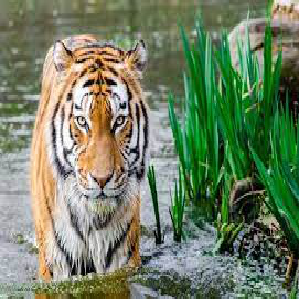

In [ ]:
pic = load_img(img_one, target_size=(299, 299))
display(pic)

In [ ]:
pic_to_array = img_to_array(pic)
pic_to_array.shape

(299, 299, 3)

In [ ]:
%%time


inception_model = InceptionResNetV2(weights='imagenet')

225222656/225209952 [==============================] - 3s 0us/step
CPU times: user 7.28 s, sys: 2.01 s, total: 9.29 s
Wall time: 14.6 s


In [ ]:
expanded_dimension = np.expand_dims(pic_to_array, axis=0)
expanded_dimension.shape

(1, 299, 299, 3)

In [ ]:
pre_proccessed_img = preprocess_input(expanded_dimension)

In [ ]:
prediction = inception_model.predict(pre_proccessed_img)
decode_predictions(prediction)

49152/35363 [=========================================] - 0s 0us/step


[[('n02129604', 'tiger', 0.84690744),
  ('n02123159', 'tiger_cat', 0.067552164),
  ('n02128925', 'jaguar', 0.0012547134),
  ('n02127052', 'lynx', 0.0009032464),
  ('n03599486', 'jinrikisha', 0.0007628653)]]

In [ ]:
def format_image_inception_resnet(filename):

  pic = load_img(filename, target_size=(299, 299))
  pic_arr = img_to_array(pic)

  expand = np.expand_dims(pic_arr, axis=0)
  process_img = preprocess_input(expand)
  prediction = inception_model.predict(process_img)

  return decode_predictions(prediction)




  

In [ ]:
format_image_inception_resnet(filename='/content/dpg.jpg')

[[('n02101388', 'Brittany_spaniel', 0.27870318),
  ('n02099601', 'golden_retriever', 0.19734661),
  ('n02099267', 'flat-coated_retriever', 0.05349195),
  ('n02100583', 'vizsla', 0.041832495),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.018480446)]]

In [ ]:
vgg19_model = VGG19()


574726144/574710816 [==============================] - 6s 0us/step


In [ ]:
def format_image_vgg19(filename):

  pic = load_img(filename, target_size=(224, 224))
  pic_arr = img_to_array(pic)

  expand = np.expand_dims(pic_arr, axis=0)
  img_vgg19 = preprocess_input_vgg19(expand)

  vgg19_predictions = vgg19_model.predict(img_vgg19)

  return decode_vgg19_predictions(vgg19_predictions)





  

In [ ]:
format_image_vgg19(filename='/content/tiger.jpg')

[[('n02129604', 'tiger', 0.8311676),
  ('n02123159', 'tiger_cat', 0.16817747),
  ('n02127052', 'lynx', 0.00018637405),
  ('n02129165', 'lion', 9.2981296e-05),
  ('n02123045', 'tabby', 7.097985e-05)]]